In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
consumerKey ="add key"
consumerSecret = "add secret"
accessToken = "add access token  "
accessTokenSecret = "add token secret  "
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
tweet_list = []

positive  = 0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if ((analysis.sentiment.polarity < 5) and ():
        neutral += 1
    
    elif (analysis.sentiment.polarity < 0.00):
        negative += 1
        
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)

Please enter keyword or hashtag to search: trump
Please enter how many tweets to analyze: 100
RT @KedricReshon: @SaycheeseDGTL Trump really managed to buy the hearts and minds of some black people for $2,500 dollars.
RT @MuellerSheWrote: Considering trump called veterans and active duty service members suckers and losers - YES - I will take the word of t…
@The_Trump_Train No!
RT @TristanSnell: When Donald Trump ran for president in 2016, he boasted he would entirely eliminate the national debt in 8 years. 

Inste…
RT @CollinRugg: We all know Trump would have blown that Chinese spy balloon out of the sky the second its existence was known.
RT @Une_brise398: 今月更新のTRUMPワンシーン、実は連載前にコンペで描かせていただいたので描いたのは２回目になります。画像は過去のものです。懐かしいですね。（担当さんから許可済） https://t.co/ai8e6eneW8
@kikimelendez Just like Pelosi respected Trump SOTU speech. https://t.co/CgOvqh5XsJ
RT @MichaelSteele: Tuckems, of 226 federal judges appointed by Trump the total number of Black people? 9!! (he says in that high pitched vo…
RT @

In [11]:
tweet_list = pd.DataFrame(tweet_list)
tweet_list

,0
0,RT @Sainttwyd: 🎁Partnered with Trump Digital T...
1,RT @af40ong: @BillGates @Trump @POTUS ok giv m...
2,"@CNN As lies go, this is one of the lamest.\nI..."
3,@krassenstein Never happened and the one that ...
4,@romik1940 @dbongino Omg why do people think I...
...,...
95,RT @lindyli: The Koch billionaire donor empire...
96,RT @KaivanShroff: Biden demanded stronger defe...
97,RT @CollinRugg: The Biden Balloon Blunder was ...
98,"RT @mehdirhasan: ""Republicans have played foot..."


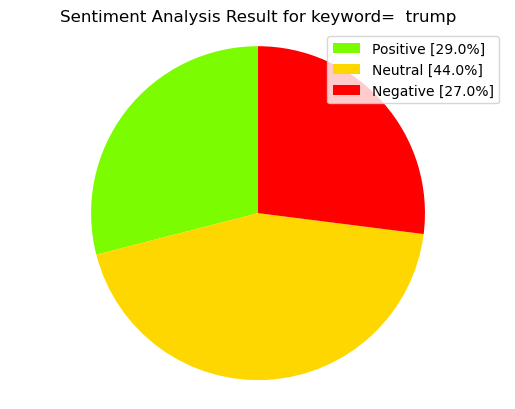

In [12]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['lawngreen','gold','red']

patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(patches, labels, loc='best')
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [13]:
tweet_list.drop_duplicates(inplace = True)

In [14]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @Sainttwyd: 🎁Partnered with Trump Digital T...,partnered with trump digital trading card ...
1,RT @af40ong: @BillGates @Trump @POTUS ok giv m...,ok giv me money
2,"@CNN As lies go, this is one of the lamest.\nI...",as lies go this is one of the lamest it wo...
3,@krassenstein Never happened and the one that ...,never happened and the one that got shot dow...
4,@romik1940 @dbongino Omg why do people think I...,omg why do people think i automatically su...
5,@WhiteHouse Our economy was so much better und...,our economy was so much better under trump ...
6,RT @LePapillonBlu2: Melania Trump’s portrait. ...,melania trump s portrait
7,RT @RepAndyBiggsAZ: If the Biden Admin was con...,if the biden admin was concerned about fallin...
8,@The_Trump_Train no,trump train no
9,@zebulgar Even the bots understand that Trump ...,even the bots understand that trump is a big...


In [15]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("C:\cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


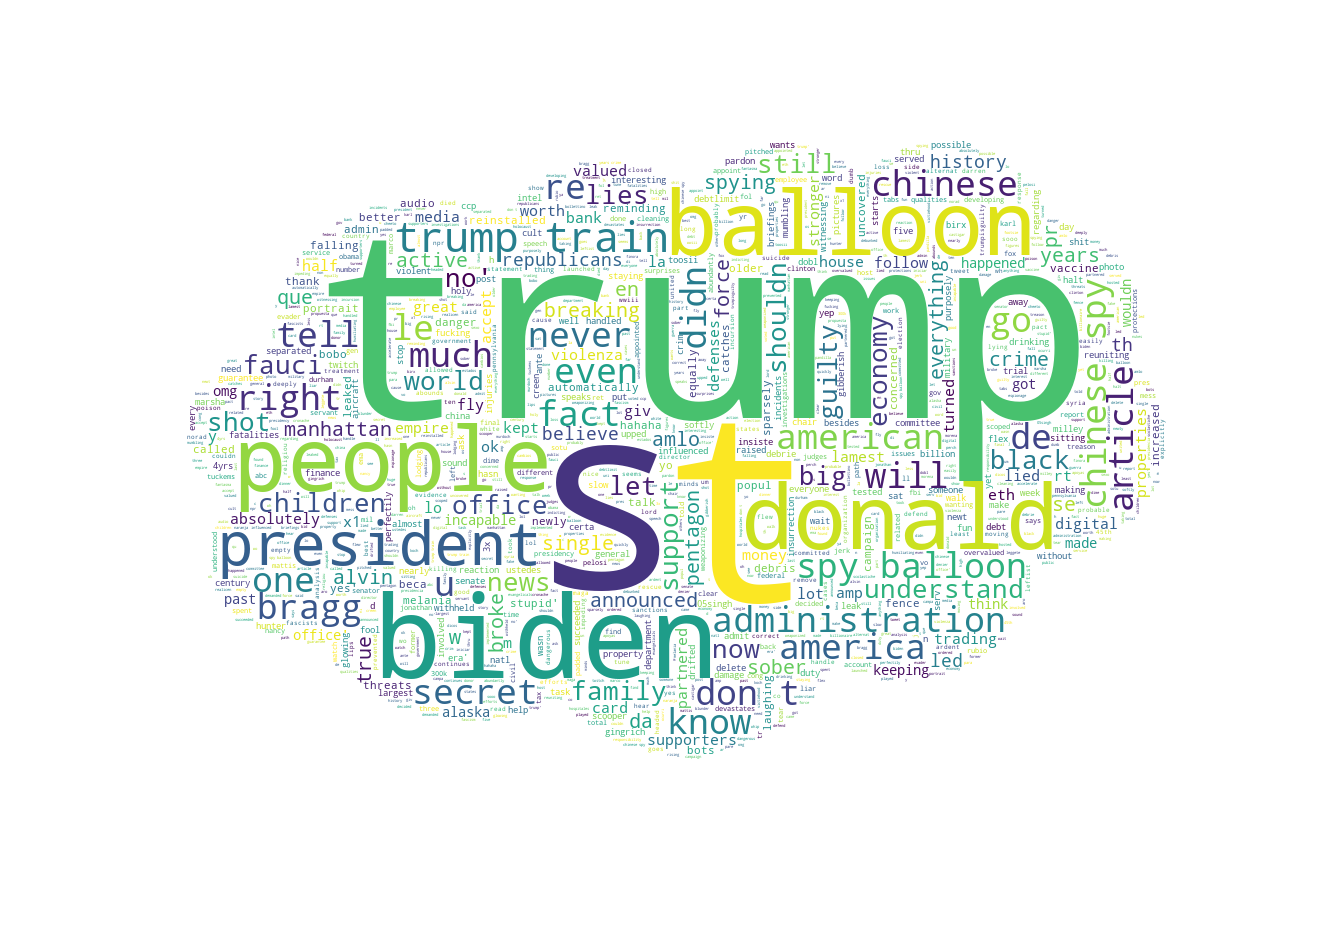

In [16]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)